# 互评作业1 数据探索性分析与数据预处理（3220211004 高婷）

## 1. 相关说明
### 1.1 数据集说明
* Wine Reviews
* Chicago Building Violations

### 1.2 程序所在代码仓库地址
https://github.com/nsygtc/DataMining

## 2. Wine Reviews 数据分析 
### 2.1 数据集描述
涉及的属性如下：
* "country":葡萄酒所属国家  
* "description":关于葡萄酒的说明  
* "designation":葡萄的产地  
* "points":葡萄酒的评分  
* "price":一瓶葡萄酒的价格  
* "province":生产葡萄酒的省份  
* "region_1":葡萄种植地  
* "region_2":葡萄特定种植地  
* "taster_name":品酒师  
* "taster_twitter_handle":品酒师的推特  
* "title":葡萄酒评论的标题  
* "variety":用于制酒的葡萄的品种  
* "winery":酿酒厂  
    
其中，price、points属于数值属性，其余属于标称属性。
### 2.2 实验环境
实现语言：Python3.8.10<br>
依赖包：numpy,pandas,matplotlib

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute  import KNNImputer
from sklearn.linear_model import LinearRegression

### 2.3 数据摘要
+ 数据集：winemag-data_first150k.csv 与 winemag-data-130k-v2.csv
+ 标称属性，给出每个可能取值的频数  
+ 数值属性，给出5数概括及缺失值的个数

#### 2.3.1 标称属性
(1) winemag-data_first150k.csv
+ country

|country|counts|
|:--:|:--:|
| US | 62397 |
| Italy | 23478 |
| France | 21098 |
| Spain | 8268 |
| Chile | 5816 |
| Argentina | 5631 |
| Portugal | 5322 |
| Australia | 4957 |
| New Zealand | 3320 |
| Austria | 3057 |
| Germany | 2452 |
| South Africa | 2258 |
| Greece | 884 |
| Israel | 630 |
| Hungary | 231 |
| Canada | 196 |
| Romania | 139 |
| Slovenia | 94 |
| Uruguay | 92 |
| Croatia | 89 |
| Bulgaria | 77 |
| Moldova | 71 |
| Mexico | 63 |
| Turkey | 52 |
| Georgia | 43 |
| Lebanon | 37 |
| Cyprus | 31 |
| Brazil | 25 |
| Macedonia | 16 |
| Serbia | 14 |
| Morocco | 12 |
| England | 9 |
| Luxembourg | 9 |
| Lithuania | 8 |
| India | 8 |
| Czech Republic | 6 |
| Ukraine | 5 |
| Switzerland | 4 |
| South Korea | 4 |
| Bosnia and Herzegovina | 4 |
| Slovakia | 3 |
| China | 3 |
| Egypt | 3 |
| Tunisia | 2 |
| Montenegro | 2 |
| Albania | 2 |
| Japan | 2 |
| US-France | 1 |

由于其他标称属性的可能取值过多，在此不详细列举。<br>
相关代码如下：

In [11]:
path1 = './Wine Reviews/winemag-data_first150k.csv'
train1 = pd.read_csv(path1)
counts1 = train1['country'].value_counts()
print(counts1)

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

(2) winemag-data-130k-v2.csv
+ country

|country|counts|
|:--:|:--:|
| US | 54504 |
| France | 22093 |
| Italy | 19540 |
| Spain | 6645 |
| Portugal | 5691 |
| Chile | 4472 |
| Argentina | 3800 |
| Austria | 3345 |
| Australia | 2329 |
| Germany | 2165 |
| New Zealand | 1419 |
| South Africa | 1401 |
| Israel | 505 |
| Greece | 466 |
| Canada | 257 |
| Hungary | 146 |
| Bulgaria | 141 |
| Romania | 120 |
| Uruguay | 109 |
| Turkey | 90 |
| Slovenia | 87 |
| Georgia | 86 |
| England | 74 |
| Croatia | 73 |
| Mexico | 70 |
| Moldova | 59 |
| Brazil | 52 |
| Lebanon | 35 |
| Morocco | 28 |
| Peru | 16 |
| Ukraine | 14 |
| Serbia | 12 |
| Macedonia | 12 |
| Czech Republic | 12 |
| Cyprus | 11 |
| India | 9 |
| Switzerland | 7 |
| Luxembourg | 6 |
| Bosnia and Herzegovina | 2 |
| Armenia | 2 |
| China | 1 |
| Egypt | 1 |
| Slovakia | 1 |

由于其他标称属性的可能取值过多，在此不逐一列举。<br>
相关代码如下：

In [13]:
path2 = './Wine Reviews/winemag-data-130k-v2.csv'
train2 = pd.read_csv(path2)
counts2 = train2['country'].value_counts()
print(counts2)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

#### 2.3.2 数值属性
(1) winemag-data_first150k.csv  
+ 均值、标准差、5数概括

||points|price|
|:--:|:--:|:--:|
|mean|87.8884|33.1315|
|std|3.2224|36.3225|
|min|80|4|
|25%|86|16|
|50%|88|24|
|75%|90|40|
|max|100|2300|
    
+ 缺失值个数

||缺失值个数|
|:--:|:--:|
|points|0|
|price|13695|

In [14]:
m1 = train1.describe()
print(m1)
n1 = train1.isnull().sum()
print(n1)

          Unnamed: 0         points          price
count  150930.000000  150930.000000  137235.000000
mean    75464.500000      87.888418      33.131482
std     43569.882402       3.222392      36.322536
min         0.000000      80.000000       4.000000
25%     37732.250000      86.000000      16.000000
50%     75464.500000      88.000000      24.000000
75%    113196.750000      90.000000      40.000000
max    150929.000000     100.000000    2300.000000
Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


(2) winemag-data-130k-v2.csv
+ 均值、标准差、5数概括

||points|price|
|:--:|:--:|:--:|
|mean|88.4471|35.3634|
|std|3.0397|41.0222|
|min|80|4|
|25%|86|17|
|50%|88|25|
|75%|91|42|
|max|100|3300|

  + 缺失值个数

||缺失值个数|
|:--:|:--:|
|points|0|
|price|8996|

In [15]:
m2 = train2.describe()
print(m2)
n2 = train2.isnull().sum()
print(n2)

          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


### 2.4 数据可视化
+ 使用直方图、盒图等检查数据分布及离群点

#### 2.4.1 直方图
(1) winemag-data_first150k.csv   

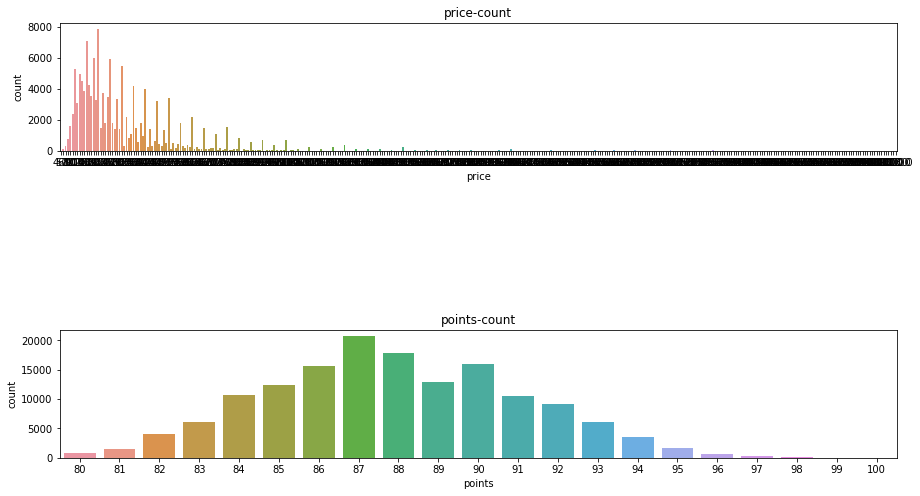

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train1.price)
plt.title('price-count')
plt.subplot(313)
sns.countplot(x = train1.points)
plt.title('points-count')
plt.show()

(2) winemag-data-130k-v2.csv   

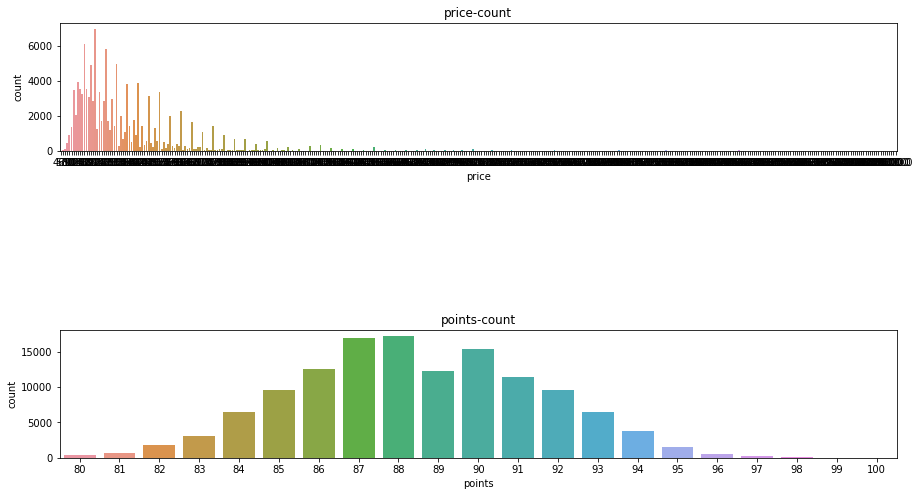

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train2.price)
plt.title('price-count')
plt.subplot(313)
sns.countplot(x = train2.points)
plt.title('points-count')
plt.show()

#### 2.4.2 盒图
(1) winemag-data_first150k.csv   

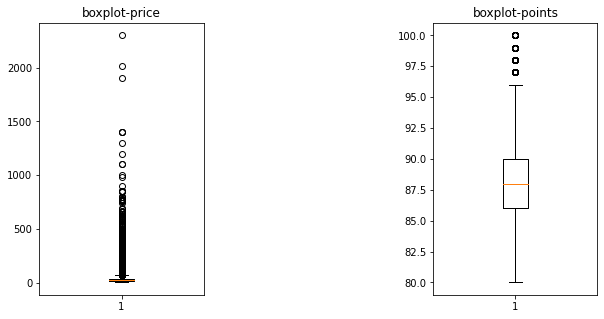

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('boxplot-price')
plt.subplot(133)
plt.boxplot(train1.points)
plt.title('boxplot-points')
plt.show()

(2) winemag-data-130k-v2.csv   

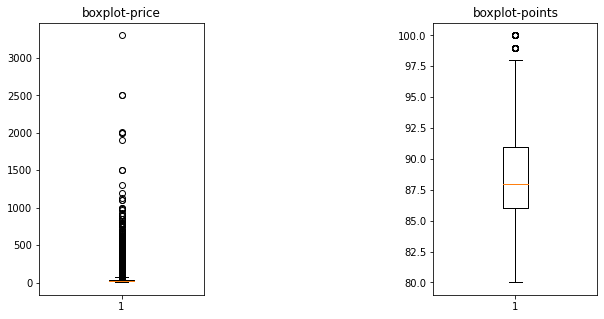

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('boxplot-price')
plt.subplot(133)
plt.boxplot(train2.points)
plt.title('boxplot-points')
plt.show()

### 2.5 缺失数据处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

+ 将缺失部分剔除   
+ 用最高频率值来填补缺失值    
+ 通过属性的相关关系来填补缺失值   
+ 通过数据对象之间的相似性来填补缺失值 

注意：在处理后，要可视化地对比新旧数据集。
#### 2.5.1 将缺失部分剔除
(1) winemag-data_first150k.csv  
+ 直方图

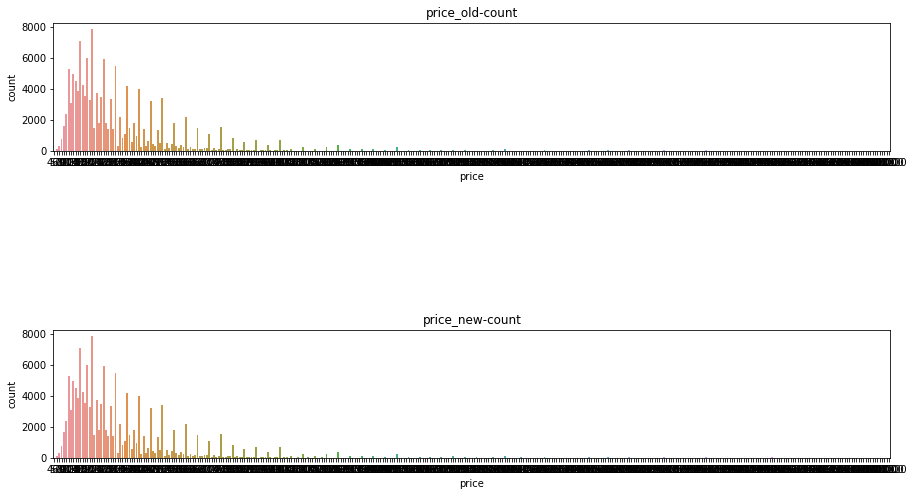

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train1.price)
plt.title('price_old-count')
plt.subplot(313)
sns.countplot(x = train1.price.dropna())
plt.title('price_new-count')
plt.show()

+ 盒图   
    由于盒图在绘制过程中需剔除缺失值，故结果不变。

(2) winemag-data-130k-v2.csv   
+ 直方图

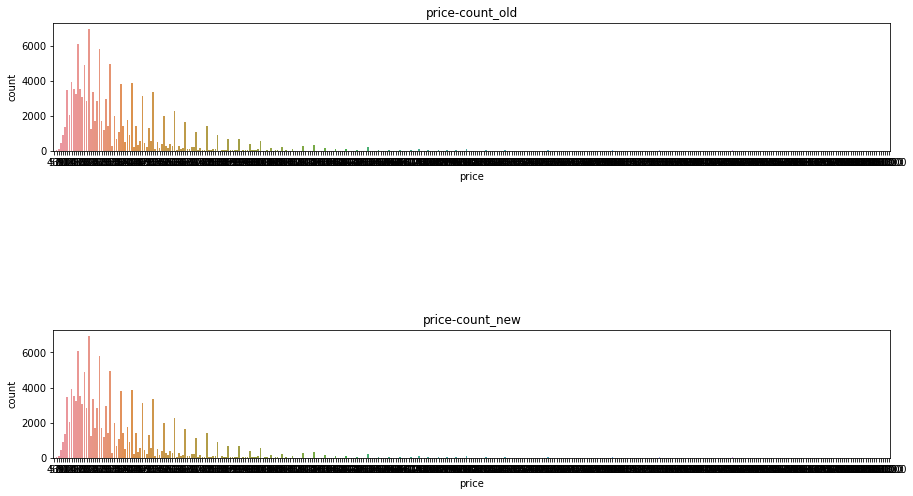

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train2.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = train2.price.dropna())
plt.title('price-count_new')
plt.show()

+ 盒图   
    由于盒图在绘制过程中需剔除缺失值，故结果不变。

#### 2.5.2 用最高频率值来填补缺失值 
(1) winemag-data_first150k.csv  
+ 直方图

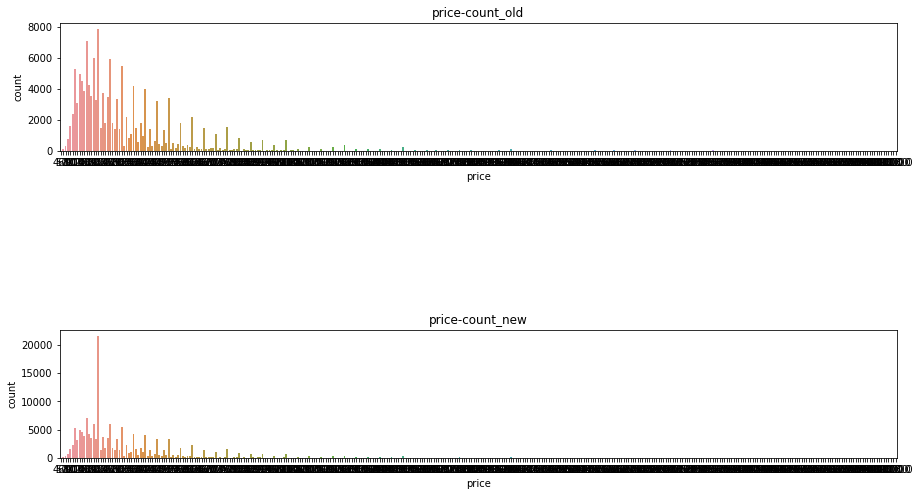

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train1.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = train1.price.fillna(train1['price'].value_counts().index[0]))
plt.title('price-count_new')
plt.show()

+ 盒图   

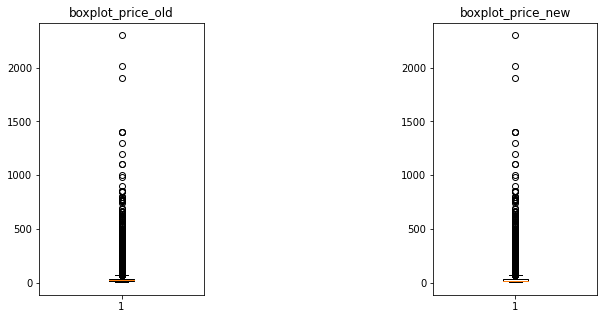

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('boxplot_price_old')
plt.subplot(133)
plt.boxplot(train1.price.fillna(train1['price'].value_counts().index[0]))
plt.title('boxplot_price_new')
plt.show()

(2) winemag-data-130k-v2.csv   
+ 直方图

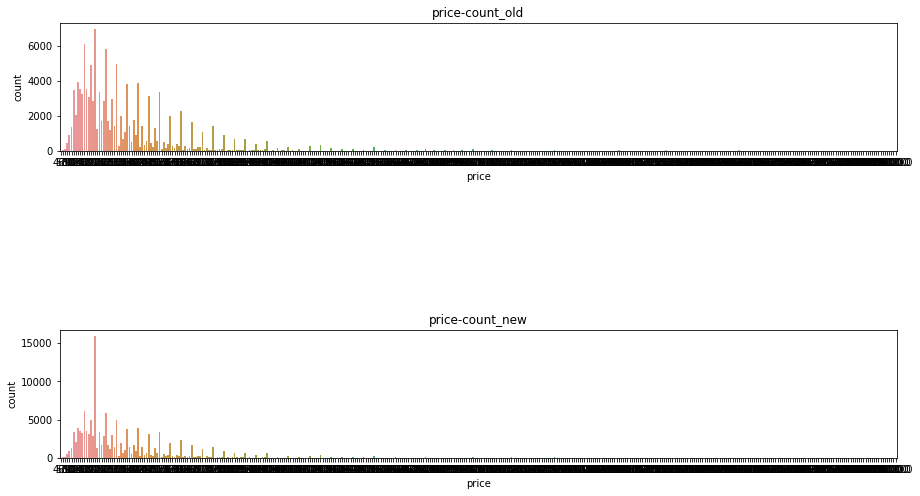

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train2.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = train2.price.fillna(train2['price'].value_counts().index[0]))
plt.title('price-count_new')
plt.show()

+ 盒图   

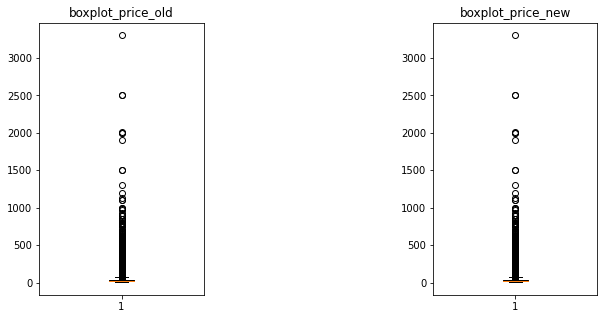

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('boxplot_price_old')
plt.subplot(133)
plt.boxplot(train2.price.fillna(train2['price'].value_counts().index[0]))
plt.title('boxplot_price_new')
plt.show()

#### 2.5.3 通过属性的相关关系来填补缺失值
(1) winemag-data_first150k.csv  

In [50]:
data1 = train1[['points', 'price']].copy(deep=True)
data_pred = data1[np.isnan(data1['price'])]
known_price = data1[data1.price.notnull()].values
y = known_price[:, 0] # price
x = known_price[:, 1:] # points
line_reg = LinearRegression()
line_reg.fit(x, y)
data_pred['price'] = line_reg.predict(data_pred['points'].values.reshape(-1, 1))
data1.loc[(data1.price.isnull()), 'price'] = data_pred['price']
print(data1.shape)
print(data1.isnull().sum())

(150930, 2)
points    0
price     0
dtype: int64


+ 直方图

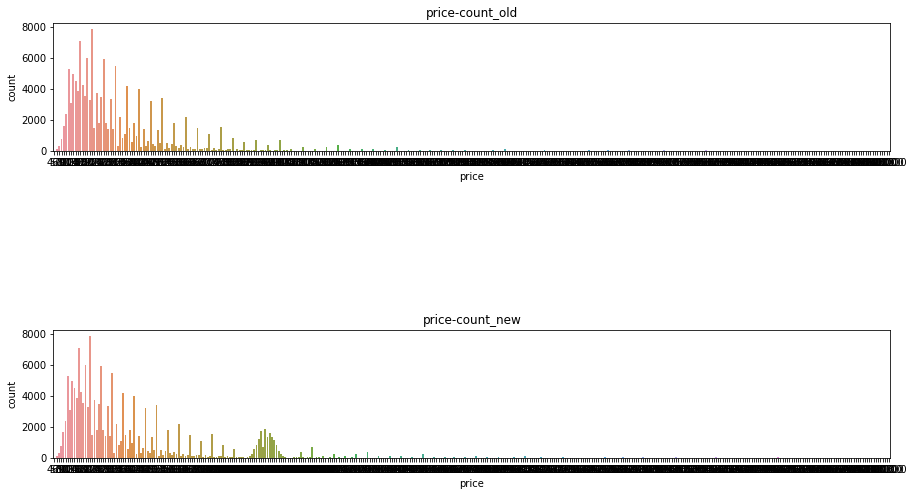

In [51]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train1.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = data1.price)
plt.title('price-count_new')
plt.show()

+ 盒图   

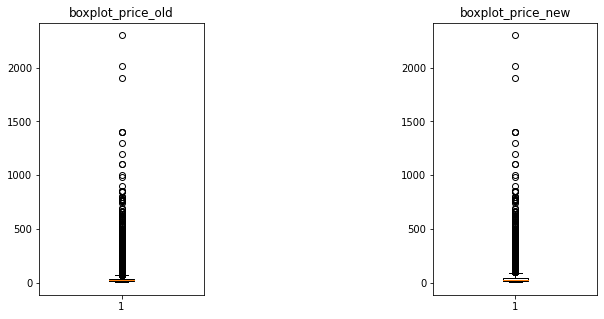

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('boxplot_price_old')
plt.subplot(133)
plt.boxplot(data1.price)
plt.title('boxplot_price_new')
plt.show()

(2) winemag-data-130k-v2.csv   

In [53]:
data2 = train2[['points', 'price']].copy(deep=True)
data_pred = data2[np.isnan(data2['price'])]
known_price = data2[data2.price.notnull()].values
y = known_price[:, 0] # price
x = known_price[:, 1:] # points
line_reg = LinearRegression()
line_reg.fit(x, y)
data_pred['price'] = line_reg.predict(data_pred['points'].values.reshape(-1, 1))
data2.loc[(data2.price.isnull()), 'price'] = data_pred['price']
print(data2.shape)
print(data2.isnull().sum())

(129971, 2)
points    0
price     0
dtype: int64


+ 直方图

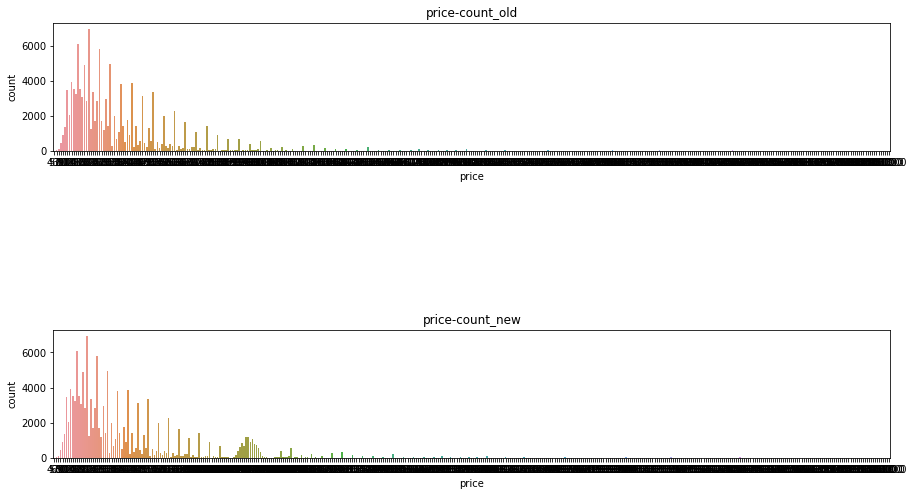

In [54]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train2.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = data2.price)
plt.title('price-count_new')
plt.show()

+ 盒图   

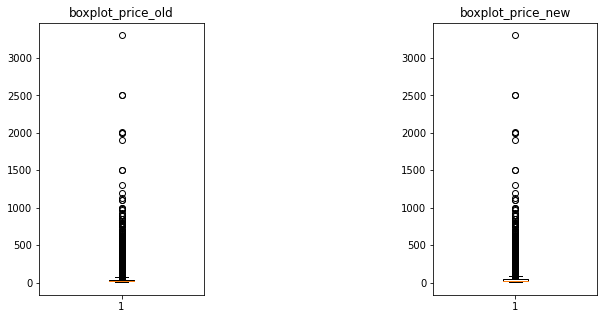

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('boxplot_price_old')
plt.subplot(133)
plt.boxplot(data2.price)
plt.title('boxplot_price_new')
plt.show()

#### 2.5.4 通过数据对象之间的相似性来填补缺失值 
(1) winemag-data_first150k.csv  

In [56]:
data1_copy = train1.copy(deep=True)
imputer = KNNImputer(n_neighbors=3)
data1_copy[['points', 'price']] = imputer.fit_transform(data1_copy[['points', 'price']])
print(data1_copy.isnull().sum())

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


+ 直方图

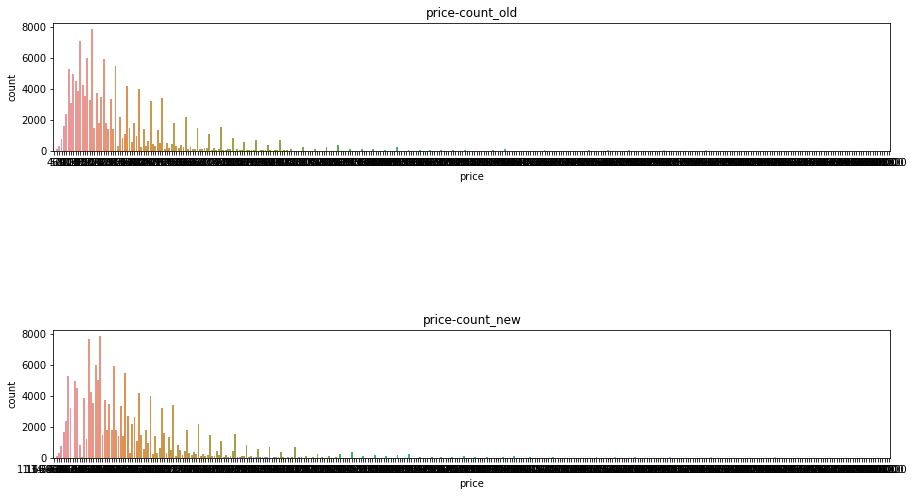

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train1.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = data1_copy.price)
plt.title('price-count_new')
plt.show()

+ 盒图   

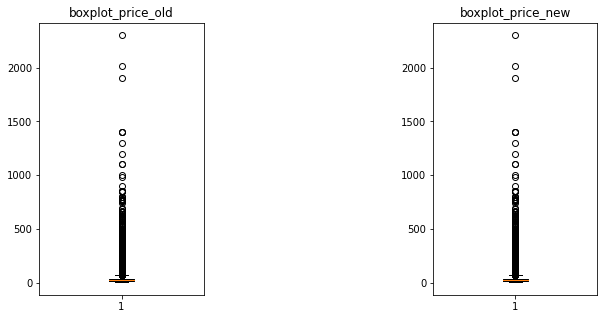

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('boxplot_price_old')
plt.subplot(133)
plt.boxplot(data1_copy.price)
plt.title('boxplot_price_new')
plt.show()

(2) winemag-data-130k-v2.csv   

In [59]:
data2_copy = train2.copy(deep=True)
imputer = KNNImputer(n_neighbors=3)
data2_copy[['points', 'price']] = imputer.fit_transform(data2_copy[['points', 'price']])
print(data2_copy.isnull().sum())

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                        0
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


+ 直方图

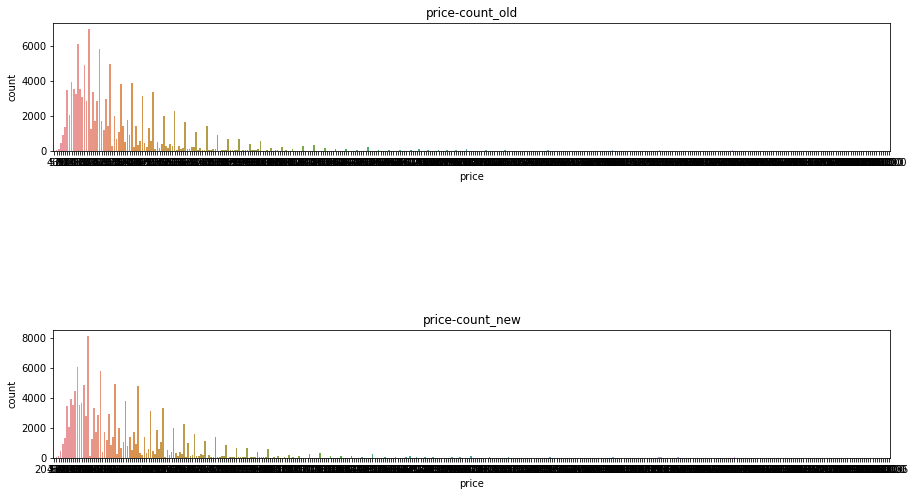

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = train2.price)
plt.title('price-count_old')
plt.subplot(313)
sns.countplot(x = data2_copy.price)
plt.title('price-count_new')
plt.show()

+ 盒图   

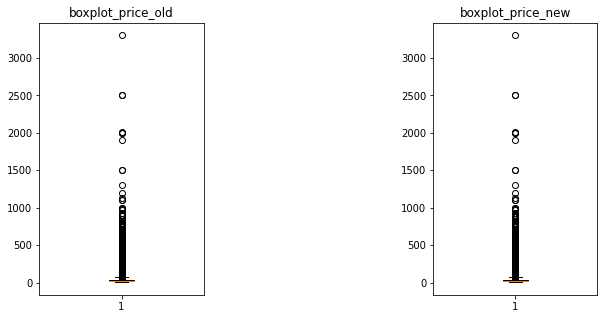

In [62]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('boxplot_price_old')
plt.subplot(133)
plt.boxplot(data2_copy.price)
plt.title('boxplot_price_new')
plt.show()

## 3. Chicago Building Violations 数据分析 
### 3.1 数据集描述
涉及的属性如下：
* "ID"  
* "VIOLATION LAST MODIFIED DATE"  
* "VIOLATION DATE":The date the violation was cited.  
* "VIOLATION CODE":The Violation Code.  
* "VIOLATION STATUS":  Complied = Violations have been addressed; Open = Violations are open; No Entry = Inspector could not gain access to the premise to conduct an inspection.
* "VIOLATION STATUS DATE"  
*    "VIOLATION DESCRIPTION":The description of the violation corresponding to the Violation Code value.  
*    "VIOLATION LOCATION"  
*    "VIOLATION INSPECTOR COMMENTS"  
*   "VIOLATION ORDINANCE"  
*   "INSPECTOR ID"   
*   "INSPECTION NUMBER"  
*   "INSPECTION STATUS"  
*   "INSPECTION WAIVED"  
*   "INSPECTION CATEGORY": COMPLAINT – Inspection is a result of a 311 Complaint. PERIODIC – Inspection is a result of recurring inspection (typically on an annual cycle). PERMIT – Inspection is a result of a permit. REGISTRATION – Inspection is a result of a Registration (typically Vacant Building Registration).  
*   "DEPARTMENT BUREAU"  
*   "ADDRESS"  
*   "STREET NUMBER"  
*    "STREET DIRECTION"  
*   "STREET NAME"  
*   "STREET TYPE"  
*   "PROPERTY GROUP": Properties (lots) in the City of Chicago can typically have multiple point addresses, range addresses and buildings. Examples are corner lots, large lots, lots with front and rear buildings, etc.. As a result, inspections (and their associated violations), permits and complaints related to a single property could have different addresses. This problem can be reconciled by using Property Group. All point and range addresses for a property are assigned the same Property Group key.  
*    "SSA":Special Service Areas are local tax districts that fund expanded services and programs, to foster commercial and economic development, through a localized property tax. In other cities these areas are sometimes called Business Improvement Districts (BIDs). This portal contains a map of all Chicago SSAs.   
*   "LATITUDE":经度  
*   "LONGITUDE":纬度  
*   "LOCATION"  
*   "Community Areas"  
*   "Zip Codes"
*    "Boundaries - ZIP Codes"
*    "Census Tracts"
*   "Wards"
*    "Historical Wards 2003-2015"
    
其中，Community Areas属于数值属性，VIOLATION STATUS,INSPECTION STATUS等属于标称属性。

### 3.2 实验环境
实现语言：Python3.8.10<br>
依赖包：numpy,pandas,matplotlib

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from  sklearn.ensemble import RandomForestClassifier
path = './Chicago Building Violations/building-violations.csv'
train = pd.read_csv(path)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1677788 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1677788 non-null  object 
 2   VIOLATION DATE                1677788 non-null  object 
 3   VIOLATION CODE                1677788 non-null  object 
 4   VIOLATION STATUS              1677788 non-null  object 
 5   VIOLATION STATUS DATE         641589 non-null   object 
 6   VIOLATION DESCRIPTION         1667020 non-null  object 
 7   VIOLATION LOCATION            780506 non-null   object 
 8   VIOLATION INSPECTOR COMMENTS  1502325 non-null  object 
 9   VIOLATION ORDINANCE           1630207 non-null  object 
 10  INSPECTOR ID                  1677788 non-null  object 
 11  INSPECTION NUMBER             1677788 non-null  int64  
 12  INSPECTION STATUS           

### 3.3 数据摘要
+ 数据集：building-violations.csv
+ 标称属性，给出每个可能取值的频数  
+ 数值属性，给出5数概括及缺失值的个数

#### 3.3.1 标称属性
+ VIOLATION STATUS  

|VIOLATION STATUS|counts|
|:--:|:--:|
|OPEN|1030958|
|COMPLIED|641247|
|NO ENTRY|5583|
        

+ INSPECTION STATUS   

|INSPECTION STATUS|counts|
|:--:|:--:|
|FAILED|1159758|
|PASSED|293076|
|CLOSED|224784|
|HOLD|154|

由于其他标称属性的可能取值过多，在此不逐一列举。

In [66]:
counts = train['INSPECTION STATUS'].value_counts()
print(counts)

FAILED    1159758
PASSED     293076
CLOSED     224784
HOLD          154
Name: INSPECTION STATUS, dtype: int64


#### 3.3.2 数值属性
+ 均值、标准差、5数概括

||Community Areas|
|:--:|:--:|
|mean|3.873350e+01|
|std|2.008963e+01|
|min|1.000000e+00|
|25%|2.400000e+01|
|50%|3.600000e+01|
|75%|5.800000e+01|
|max|7.700000e+01|
    
+ 缺失值个数

||缺失值个数|
|:--:|:--:|
|Community Areas|2279|

In [67]:
m = train['Community Areas'].describe()
print(m)
n = train['Community Areas'].isnull().sum()
print(n)

count    1.675509e+06
mean     3.873350e+01
std      2.008963e+01
min      1.000000e+00
25%      2.400000e+01
50%      3.600000e+01
75%      5.800000e+01
max      7.700000e+01
Name: Community Areas, dtype: float64
2279


### 3.4 数据可视化
+ 使用直方图、盒图等检查数据分布及离群点

#### 3.4.1 直方图

Text(0.5, 1.0, 'Community Areas-Count')

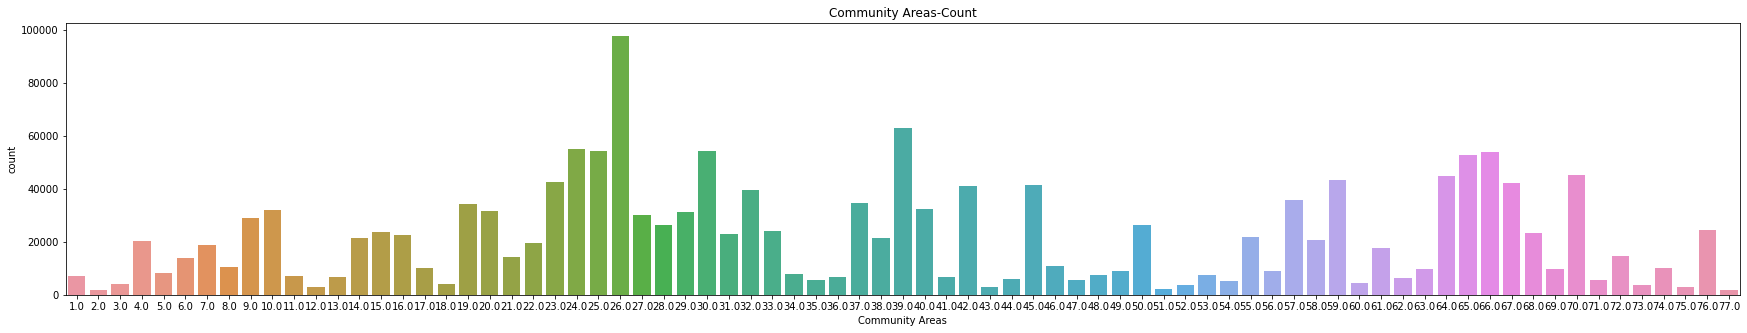

In [70]:
plt.figure(figsize=(30,5))
sns.countplot(x = train['Community Areas'])
# sns.distplot(train1.price)
plt.title('Community Areas-Count')

#### 3.4.2 盒图

Text(0.5, 1.0, 'boxplot_Community Areas')

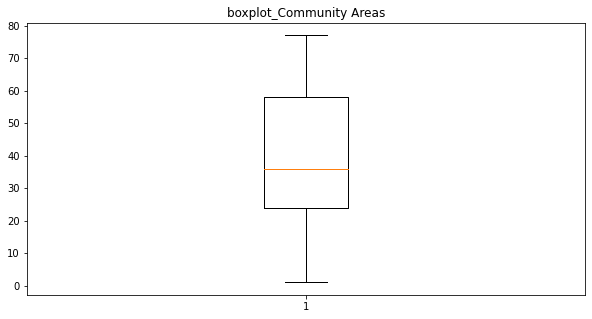

In [71]:
plt.figure(figsize=(10,5))
plt.boxplot(train['Community Areas'].dropna())
plt.title('boxplot_Community Areas')

### 3.5 缺失数据处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

+ 将缺失部分剔除   
+ 用最高频率值来填补缺失值    
+ 通过属性的相关关系来填补缺失值   
+ 通过数据对象之间的相似性来填补缺失值 

注意：在处理后，要可视化地对比新旧数据集。
#### 3.5.1 将缺失部分剔除
+ 直方图

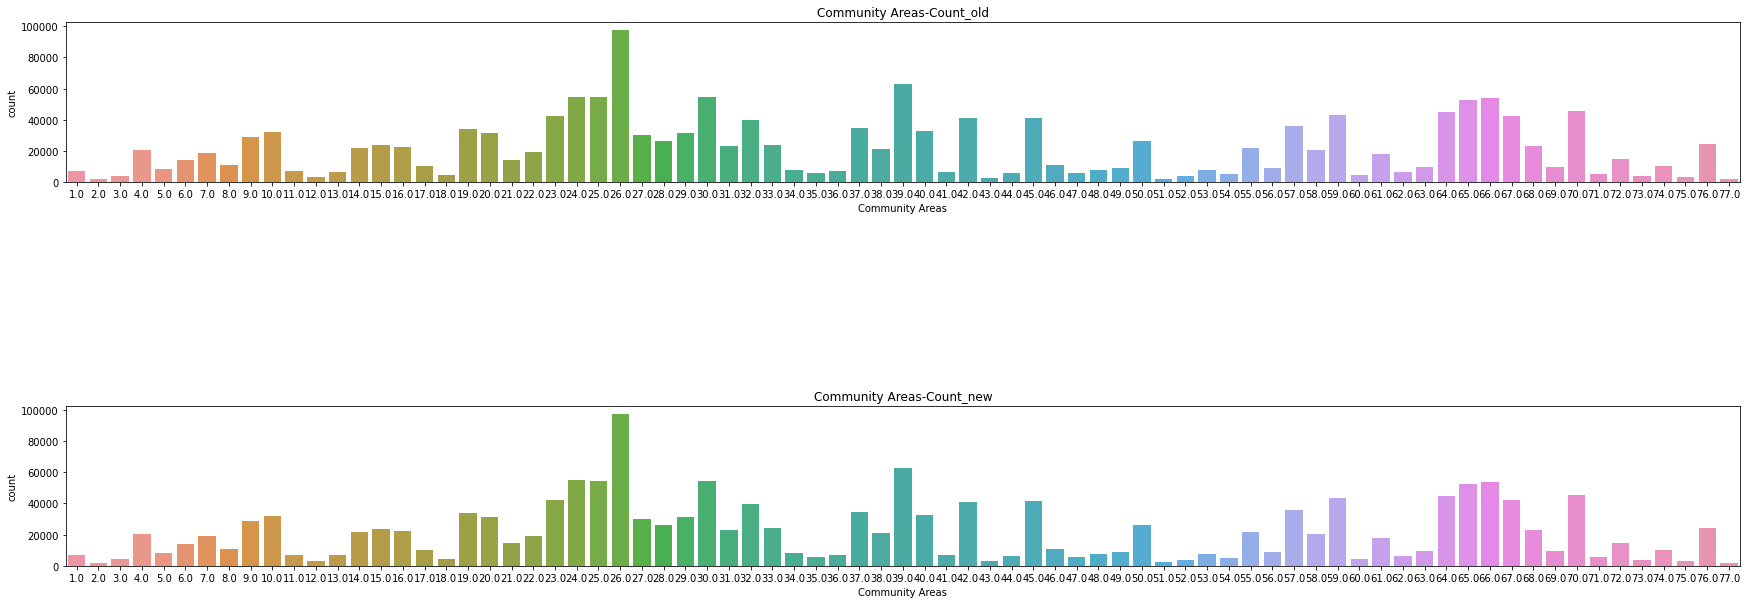

In [72]:
plt.figure(figsize=(30, 10))
plt.subplot(311)
sns.countplot(x = train['Community Areas'])
plt.title('Community Areas-Count_old')
plt.subplot(313)
sns.countplot(x = train['Community Areas'].dropna())
plt.title('Community Areas-Count_new')
plt.show()

+ 盒图  

由于盒图在绘制过程中需剔除缺失值，故结果不变。

#### 3.5.2 用最高频率值来填补缺失值 
+ 直方图

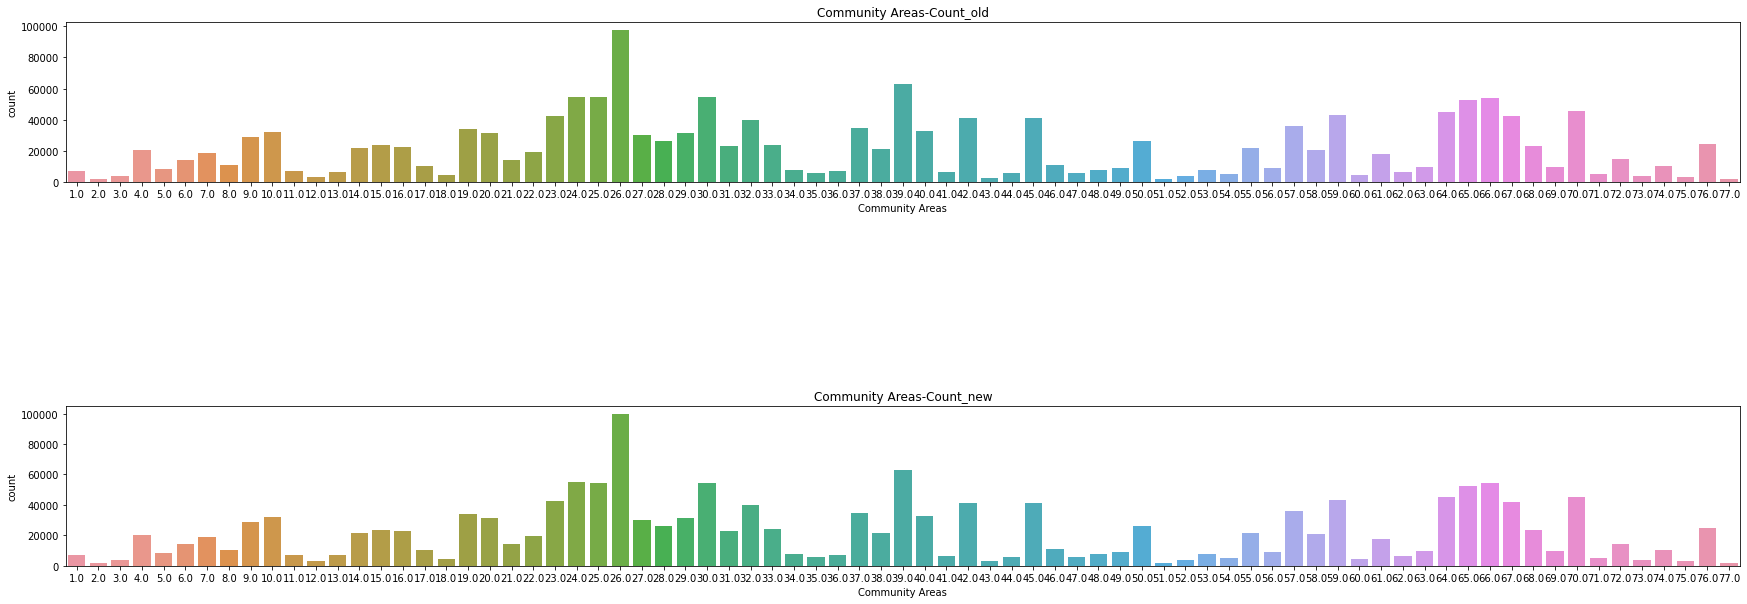

In [94]:
plt.figure(figsize=(30,10))
plt.subplot(311)
sns.countplot(x = train['Community Areas'])
plt.title('Community Areas-Count_old')
plt.subplot(313)
sns.countplot(x = train['Community Areas'].fillna(train['Community Areas'].value_counts().index[0]))
plt.title('Community Areas-Count_new')
plt.show()

+ 盒图

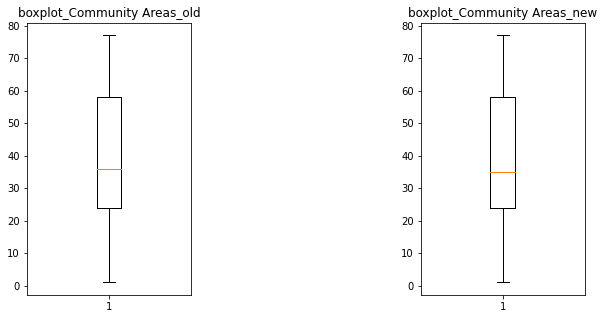

In [95]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train['Community Areas'].dropna())
plt.title('boxplot_Community Areas_old')
plt.subplot(133)
plt.boxplot(train['Community Areas'].fillna(train['Community Areas'].value_counts().index[0]))
plt.title('boxplot_Community Areas_new')
plt.show()

#### 3.5.3 通过属性的相关关系来填补缺失值

In [133]:
data = train[['Community Areas', 'LATITUDE', 'LONGITUDE']]
print(data.shape)
# data0 = data[['LATITUDE', 'LONGITUDE']].fillna(0)
print(data['Community Areas'].notnull())
test = data[data['Community Areas'].notnull()]
test_x = test[['LATITUDE', 'LONGITUDE']].fillna(0)
test_y = test[['Community Areas']]
test_x = test_x.astype(float)
test_y = test_y.astype(float)
test_z = test[['Community Areas']]
test_z = test_z.astype(float)
train_t = data[data['Community Areas'].isnull()]
train_x = train_t[['LATITUDE', 'LONGITUDE']].fillna(0).astype(float)
train_y = train_t[['Community Areas']].astype(float)
# print("test")
test_z=test_z.values.reshape(-1)
# print(test_x.shape)
# print(test_y.shape)
rfc = RandomForestClassifier()
rfc.fit(test_x, test_z)
pre = rfc.predict(train_x)
# data[data['Community Areas'].isnull(), 'Community Areas'] = pre
data.loc[(data['Community Areas'].isnull()), 'Community Areas'] = pre
print(data.isnull().sum())

(1677788, 3)
0          True
1          True
2          True
3          True
4          True
           ... 
1677783    True
1677784    True
1677785    True
1677786    True
1677787    True
Name: Community Areas, Length: 1677788, dtype: bool
Community Areas       0
LATITUDE           1510
LONGITUDE          1510
dtype: int64


+ 直方图

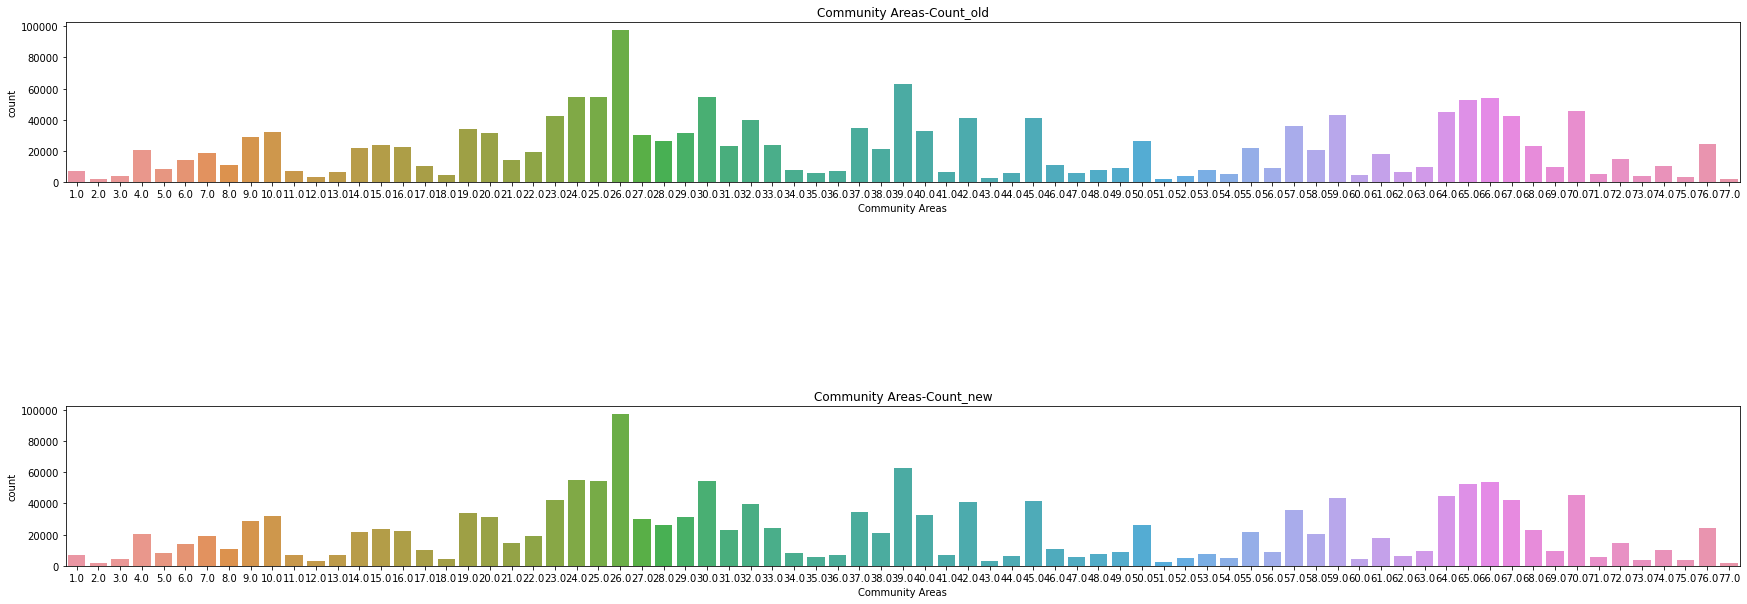

In [134]:
plt.figure(figsize=(30,10))
plt.subplot(311)
sns.countplot(x = train['Community Areas'])
plt.title('Community Areas-Count_old')
plt.subplot(313)
sns.countplot(x = data['Community Areas'])
plt.title('Community Areas-Count_new')
plt.show()

+ 盒图

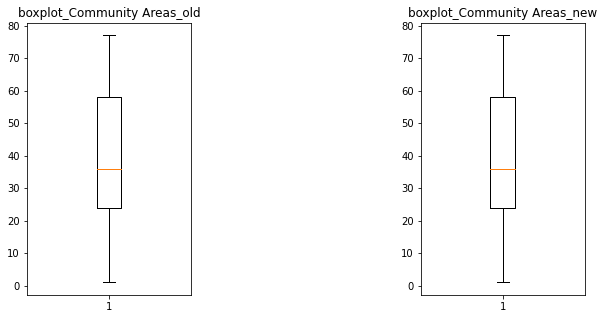

In [135]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train['Community Areas'].dropna())
plt.title('boxplot_Community Areas_old')
plt.subplot(133)
plt.boxplot(data['Community Areas'])
plt.title('boxplot_Community Areas_new')
plt.show()

#### 3.5.4 通过数据对象之间的相似性来填补缺失值

In [97]:
data_copy = train.copy(deep=True)
imputer = KNNImputer(n_neighbors=3)
data_copy['LATITUDE'].fillna(0)
data_copy['LONGITUDE'].fillna(0)
data_copy[['Community Areas', 'LATITUDE', 'LONGITUDE']] = imputer.fit_transform(data_copy[['Community Areas', 'LATITUDE', 'LONGITUDE']])
print(data_copy.isnull().sum())

ID                                    0
VIOLATION LAST MODIFIED DATE          0
VIOLATION DATE                        0
VIOLATION CODE                        0
VIOLATION STATUS                      0
VIOLATION STATUS DATE           1036199
VIOLATION DESCRIPTION             10768
VIOLATION LOCATION               897282
VIOLATION INSPECTOR COMMENTS     175463
VIOLATION ORDINANCE               47581
INSPECTOR ID                          0
INSPECTION NUMBER                     0
INSPECTION STATUS                    16
INSPECTION WAIVED                     0
INSPECTION CATEGORY                   0
DEPARTMENT BUREAU                     0
ADDRESS                               0
STREET NUMBER                         0
STREET DIRECTION                      0
STREET NAME                           0
STREET TYPE                       13541
PROPERTY GROUP                        0
SSA                             1356267
LATITUDE                              0
LONGITUDE                             0


+ 直方图

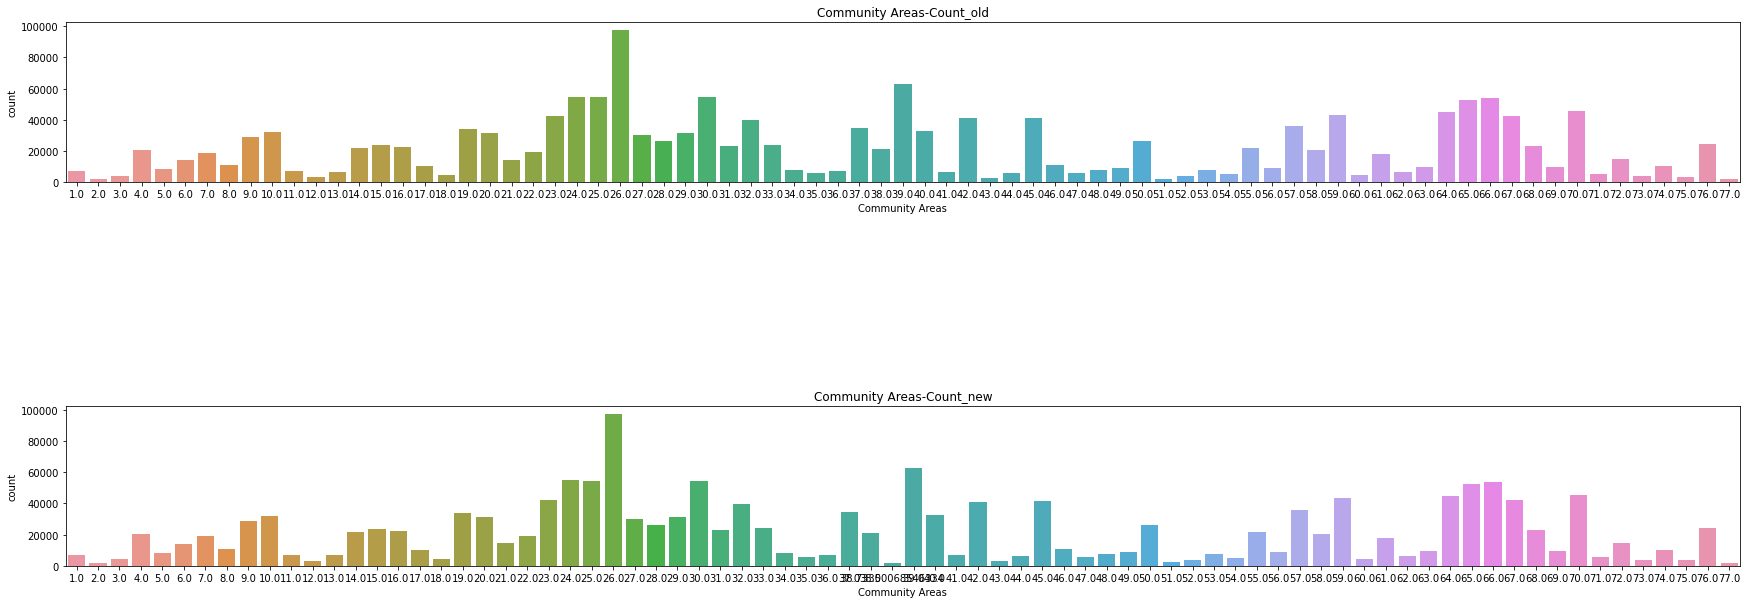

In [98]:
plt.figure(figsize=(30,10))
plt.subplot(311)
sns.countplot(x = train['Community Areas'])
plt.title('Community Areas-Count_old')
plt.subplot(313)
sns.countplot(x = data_copy['Community Areas'])
plt.title('Community Areas-Count_new')
plt.show()

+ 盒图

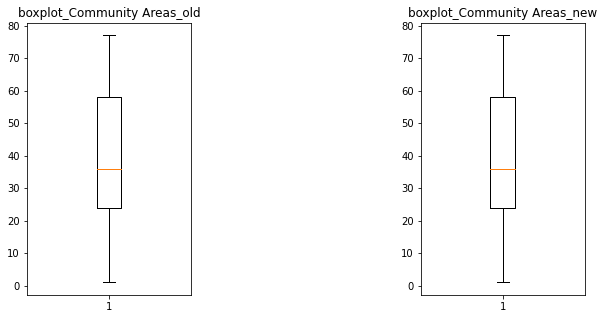

In [99]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train['Community Areas'].dropna())
plt.title('boxplot_Community Areas_old')
plt.subplot(133)
plt.boxplot(data['Community Areas'])
plt.title('boxplot_Community Areas_new')
plt.show()